# TF-IDF

定义：
在信息检索中，tf-idf（词频-逆文档频率）是一种统计方法，用以评估一个单词在一个文档集合或语料库中的重要程度。经常被用作信息检索、文本挖掘以及用户模型的权重因素。tf-idf的值会随着单词在文档中出现的次数的增加而增大，也会随着单词在语料库中出现的次数的增多而减小。tf-idf是如今最流行的词频加权方案之一


公式：TF−IDF(x)=TF(x)∗IDF(x)
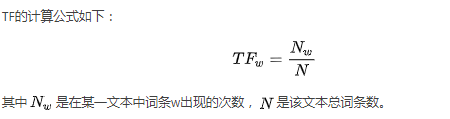

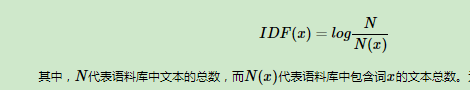

In [6]:
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  
# corpus 模拟语料库
corpus=["second third document",
        "second second document"]
tfvectorizer=CountVectorizer() 
count_vector=tfvectorizer.fit_transform(corpus) # Tf 矩阵
transformer = TfidfTransformer() # 转换Tf矩阵
tfidf = transformer.fit_transform(count_vector) # 将TF转换成Tf-Idf
arr=tfidf.toarray()
print(tfidf)
print(arr)

  (0, 2)	0.7049094889309326
  (0, 1)	0.5015489070943787
  (0, 0)	0.5015489070943787
  (1, 1)	0.8944271909999159
  (1, 0)	0.4472135954999579
[[0.50154891 0.50154891 0.70490949]
 [0.4472136  0.89442719 0.        ]]


In [8]:
import pandas as pd
from string import punctuation
import re

def cleandata(data):
    clean=[]
    # 英文标点符号+中文标点符号
    punc = punctuation + u'.,;《》？！""''@#￥%…&×（）——+【】{};；●，。&～、|\s:：'
    for line in data:
        line = re.sub(r"[{}]+".format(punc)," ",line)
        clean.append(line)
    clean=pd.DataFrame(clean)
    return clean

# clean predict data
predata=pd.read_csv('test.csv') # 
pre_clean=[]
pre_clean=cleandata(predata['review'])

# clean train data
traindata=pd.read_csv('train.csv',lineterminator='\n') #
train_clean=[]
train_clean=cleandata(traindata['review'])

# 所有清洗后的文本
all_clean=train_clean.append(pre_clean)
all_text=all_clean.iloc[:,0] # 取第一列 否则报错 转成了series
m=6100
n=6328
train_text=train_clean[0:m].iloc[:,0]
test_text=train_clean[m:n].iloc[:,0]

# Tf-idf
# 训练整个语料库
# TF-IDF一步到位
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.5,min_df=0.0003)
# =============================================================================
# all_text_vector = tfidf.fit_transform(all_text) #fit的同时transform成vector
# =============================================================================
tfidf.fit(all_text) # 让tfidf去fit这些数据
all_text_vector=tfidf.transform(all_text).toarray()

train_text_vector=tfidf.transform(train_text)
test_text_vector=tfidf.transform(test_text)



train_label=traindata[0:m]['label']
test_label=traindata[m:n]['label']



# =============================================================================
# 先算TF 再算IDF
# count_v1=CountVectorizer(vocabulary=count_v0.vocabulary_);  
# counts_train = count_v1.fit_transform(train_text);
# 
# count_v2=CountVectorizer(vocabulary=count_v0.vocabulary_);  
# counts_test = count_v2.fit_transform(test_text);
# 
# tfidftransformer = TfidfTransformer();    
# train_text_vector = tfidftransformer.fit(counts_train).transform(counts_train)
# test_text_vector = tfidftransformer.fit(counts_test).transform(counts_test)
# print(train_text_vector)
# =============================================================================


# classifcation methods

# bayes  alpha=0.2 0.7
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.2)
# output auc
clf = clf.fit(train_text_vector,train_label)
# =============================================================================
# preds = clf.predict(test_text_vector);  #输出预测标签
# preds = preds.tolist()
# =============================================================================
# proba
proba=clf.predict_proba(test_text_vector)

from sklearn import metrics
auc=metrics.roc_auc_score(test_label,proba[:,1]) # 看测试集的auc如何

pre_text=pre_clean.iloc[:,0]
pre_text_vector=tfidf.transform(pre_text)
pre_proba=clf.predict_proba(pre_text_vector)

FileNotFoundError: [Errno 2] File b'test.csv' does not exist: b'test.csv'

参考文章：https://www.jianshu.com/p/091383e86825